# 🎮 A Deep Dive Into the Gaming Universe (Exploratory Data Analysis)

Video games have become one of the most popular forms of entertainment in recent decades, with the industry generating billions of dollars in revenue each year. This notebook presents an exploratory data analysis (EDA) of video game sales data, with the aim of gaining insights into the trends and patterns in the industry.

The dataset used in this analysis contains information on video game sales from 1980 to 2020, including data on game titles, platforms, publishers, genres, ratings, and sales figures. The data was sourced from Kaggle.

In this notebook, we will explore the video game sales data using Python and various data analysis libraries, including `Pandas`, `Matplotlib`, and `Seaborn`. We will start by loading the dataset and looking into the descriptive statistics. Then, we will build more specific data visualizations to explore the different variables in our dataset.

Through this analysis, we hope to answer some key questions about the video game industry, such as:

* What are the most successful video games?
* Which gaming platforms are most popular?
* Which gaming publisher was the most successful?
* How has the gaming industry developed overtime?

By the end of this notebook, you will have gained a deeper understanding of the video game industry and the factors that contribute to the success of video games. We hope that this analysis will be useful to anyone interested in the video game industry, from gamers to developers to investors.



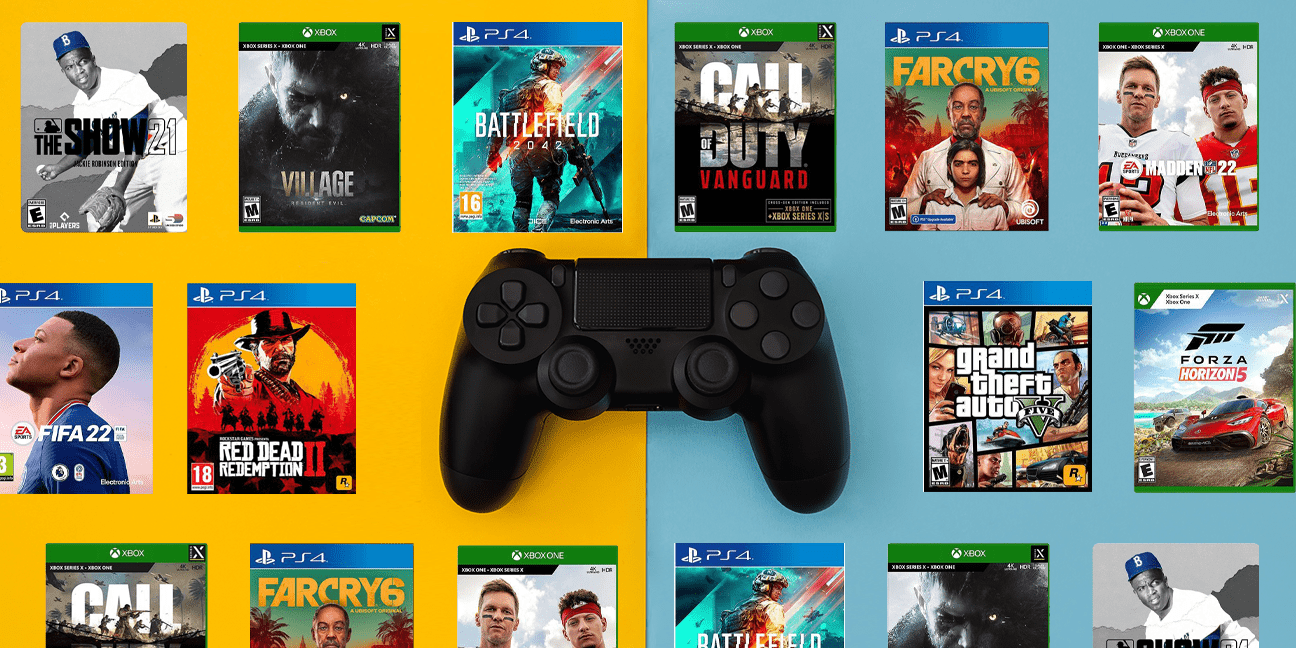

# Modules

To begin, we'll install the necessary modules for this notebook, including `numpy`, `pandas`, `matplotlib`, and `seaborn`. These modules will be used for performing exploratory data analysis on our video game sales dataset.

After installing the modules, we'll set the style of `matplotlib` and `seaborn` to `ggplot` and `darkgrid`, respectively, to enhance the aesthetics of our visualizations. If you prefer a different style, you can change it to one of your choosing.

In [1]:
#import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

#set matplotlib and seaborn style
plt.style.use('ggplot')
sns.set_style('darkgrid')

# Dataset

Next, we can load our data.

In [2]:
data = pd.read_csv("../data/vgsales.csv")
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


We have a rather simple and straightforward dataset here. Each unique row represents an individual game. The dataset contains 11 variables in total, all of them being pretty self-explanatory. The games are also ranked by *Global_Sales*, so we see the highest selling games in the first few rows.

A quick way to gain an overview of the missing data and datatype in a dataframe is to utilize the `info()` method. We can see below that we do have some variables that contain missing values, *Year* and *Publisher*. 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Given the low count of missing values and the primary objective of performing EDA in this notebook, it is reasonable to drop these variables without significant impact on our analysis.

In [4]:
#drop missing values
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Great! Now that our dataset is clear of missing values, let's get some descriptive statistics for our numerical variables in our dataset. We can do this by utilizing the `describe()` method.

In [5]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Hmmm...not very insightful. All we know is that the sales data is skewed to the right, which makes sense because there are going to be some games that sell extraordinarily well, especially when you compare them to the average game. Okay, let's not waste our time and dive straight into our dataset with some beautiful data visualizations.

# Top 10 Selling Video Games

When I saw this dataset, the first question that came to my mind was "So...what are the most popular (best selling) games in the history of gaming?". Given our dataset, we know that the answer is in the top rows of the dataframe, since it is ranked by *Global_Sales*. I could just read off the dataframe, but what's the fun in that? Let's build some visualizations!

Since this notebook is dedicated to EDA, we'll be adding some more fancy elements to our data visualizations. Here's a quick run through of the code if you have trouble understanding it:

- Extract the rows with the top ten values of Global Sales using the `nlargest` method
- Define the figure size
- Define variable on the x and y-axis of the visualization
- Define colormap. We want the color to change based on the y-value (*Global_Sales*), so we need to also define a normalizer based on the y-value)
- Build bar chart
- Add labels of the y-value on top of each bar (with formatting)
- Set the chart title and the x-axis and y-axis title (with formatting)
- Rotate the x-axis labels to 45 degrees with the center of each bar aligned to the end (right) of the labels

Ta da! We've just built a beautiful **Bar Chart**. The code feels complicated and long, but we're really just adding one element at a time. If you feel like anything is out of place or could be altered, feel free to comment below!

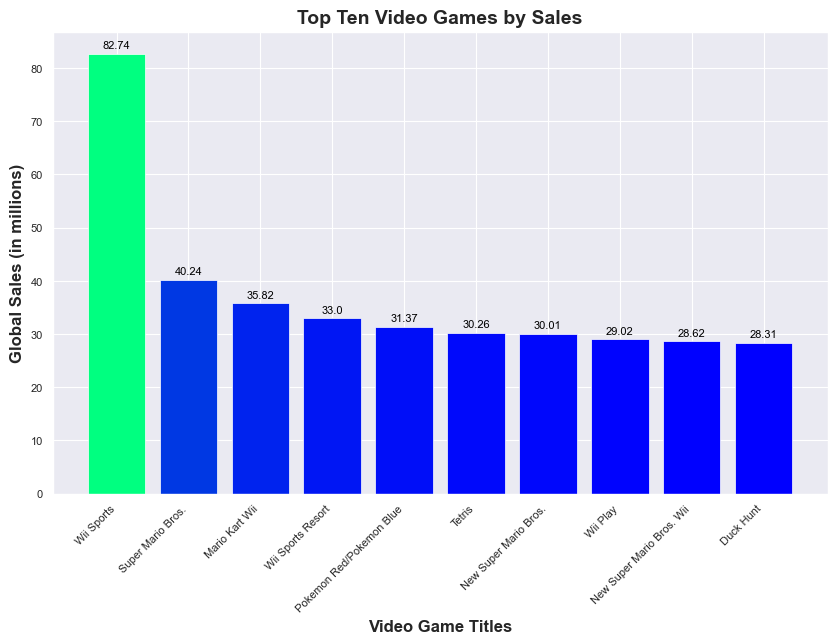

In [6]:
#rows with the top ten global sales
top_ten = data.nlargest(10, 'Global_Sales')

#set figure size
fig, ax = plt.subplots(figsize=(10, 6))

#define our x and y variable
x = top_ten['Name']
y = top_ten['Global_Sales']

#define our colormap
cmap = plt.colormaps.get_cmap('winter')                    #set colormap as winter (you can decide which cmap you prefer)
norm = mcolors.Normalize(vmin=y.min(), vmax=y.max())       #define normalizer for y values (Global_Sales)
colors = cmap(norm(y))                                     #normalize y values and then feed it into cmap to derive the colors of each bar

#create bar chart
ax.bar(x=x, height=y, color=colors)

#add value labels to each bar
for i, v in enumerate(y):
    ax.text(i, v + 1, str(v), ha='center', color="black", fontsize=8)

# set chart title and axis titles
ax.set_title('Top Ten Video Games by Sales', fontweight = "bold", fontsize= 14)
ax.set_xlabel('Video Game Titles', fontweight = "bold", fontsize= 12)
ax.set_ylabel('Global Sales (in millions)', fontweight = "bold", fontsize= 12)

#format axis ticks
plt.xticks(x, rotation=45, fontsize=8, ha="right")
plt.yticks(fontsize=8)

#display the chart
plt.show()

## Regional Breakdown of the Top Ten Selling Video Games

Ok, now what else can we play with this bar chart. For me, I'm curious how the sales of these top 10 selling games are distributed across the different regions. For instance, Wii Sports sold for 82.74 million copies. How much of this 82.74 million copies can be attributed to the North American market? The European market? The Japanese market? We can answer this question by building a **Stacked Bar Chart**. Let's take a look!

To build a stacked bar chart is not as hard as many may perceive. We just add the bars on top of each other one by one by defining the `bottom` argument. As we go up, we just stack the y values. You can see it in action in the code below.

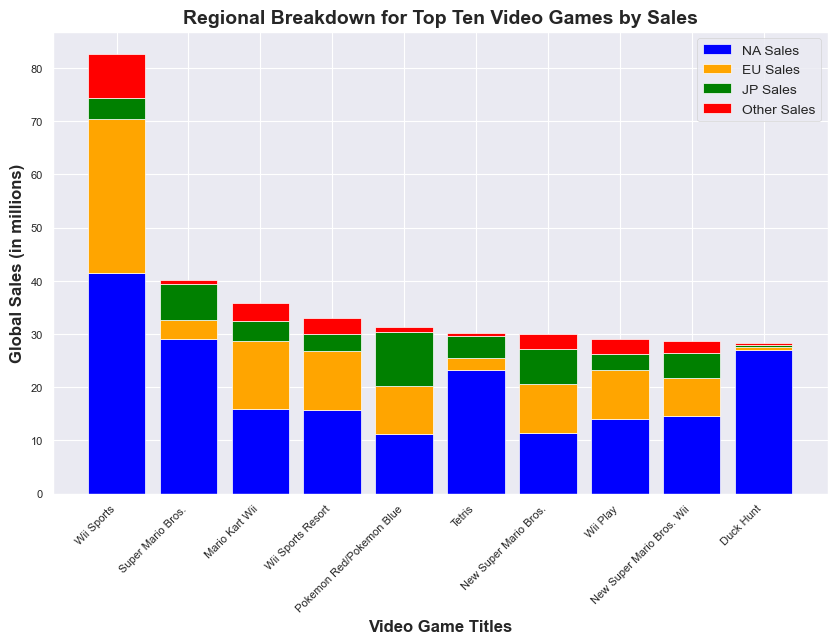

In [7]:
#extract our x and four y variables (sales from each region) from our top_ten video games
x = top_ten['Name']
y1 = top_ten["NA_Sales"]
y2 = top_ten["EU_Sales"]
y3 = top_ten["JP_Sales"]
y4 = top_ten["Other_Sales"]

#define figure size
fig, ax = plt.subplots(figsize=(10, 6))

#create the stack bar chart
ax.bar(x, y1, label='NA Sales', color='blue')
ax.bar(x, y2, label='EU Sales', color='orange', bottom=y1)
ax.bar(x, y3, label='JP Sales', color='green', bottom=y1+y2)
ax.bar(x, y4, label='Other Sales', color='red', bottom=y1+y2+y3)

#set the title, axis labels, and legend
ax.set_title('Regional Breakdown for Top Ten Video Games by Sales', fontweight = "bold", fontsize= 14)
ax.set_xlabel('Video Game Titles', fontweight = "bold", fontsize= 12)
ax.set_ylabel('Global Sales (in millions)', fontweight = "bold", fontsize= 12)
ax.legend()

#format axis ticks
plt.xticks(x, rotation=45, fontsize=8, ha="right")
plt.yticks(fontsize=8)

#display the chart
plt.show()

Woohoo! Would you look at that beauty. Let's see what insights we can extract from this stacked bar chart. 

- Tetris and Duck Hunt are predominantly sold in the North American region.
- The Japanese market take a relatively larger share in Pokemon Red/Pokemon Blue
- Super Mario Bros. and Tetris performed relatively poorly in the European Market

What else do you see that I didn't catch? Again, comment below!

## Publishers of the Top Ten Selling Video Games

The next question I want to ask is "Who published these top selling video games?". This should give us a good idea of which companies have been the most successful in the gaming industry. To do this, all we have to is to change the bar colors based on the *Publisher*. `Seaborn` allows us to accomplish this super easily by setting the `hue` variable. Let's take a look.

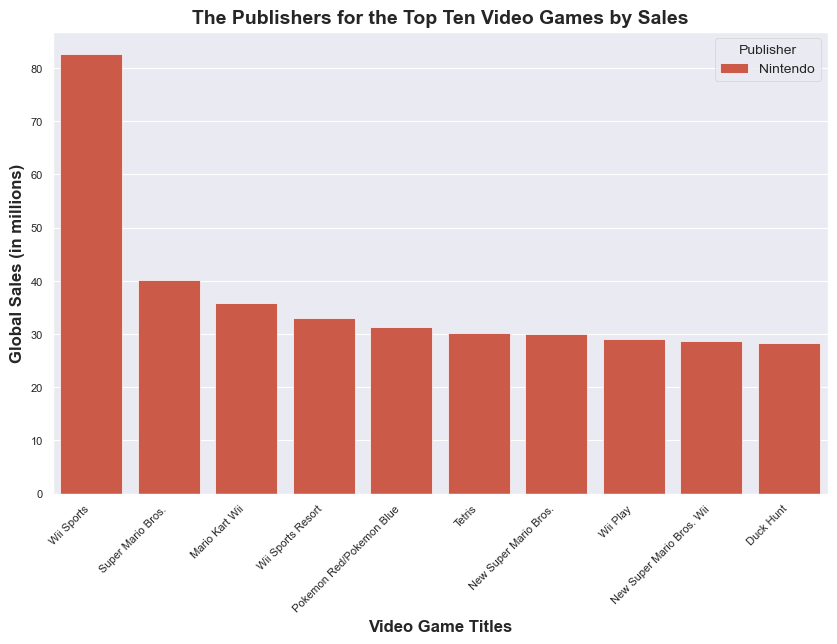

In [8]:
#define figure size
fig, ax = plt.subplots(figsize=(10, 6))

#seaborn to create barplot
ax = sns.barplot(data=top_ten, x="Name", y="Global_Sales", hue="Publisher", dodge=False)

#set the title, axis labels
ax.set_title('The Publishers for the Top Ten Video Games by Sales', fontweight = "bold", fontsize= 14)
ax.set_xlabel('Video Game Titles', fontweight = "bold", fontsize= 12)
ax.set_ylabel('Global Sales (in millions)', fontweight = "bold", fontsize= 12)

#format x and y ticks
plt.xticks(rotation=45, fontsize=8, ha="right")
plt.yticks(fontsize=8)

#display the chart
plt.show()

Wow! All top ten games were published by Nintendo. No other colors can be seen. What a dominant force! 

# *Platform*

## Count Plot

Okay, now that we've had a quick overview of our dataset, let's go through each variable one by one and perform univariate EDA. We'll start with *Platform*. Typically, for categorical variables, I like to visualize them with a simple **count plot**. It's super easy to implement with `seaborn`.

We'll first construct a series for the counts (frequency) of *Platform* to order the countplot from most to least. Here, I've also demonstrated another method to add label values to each count bars. You may refer to the comments in the code to understand what each line of code does.

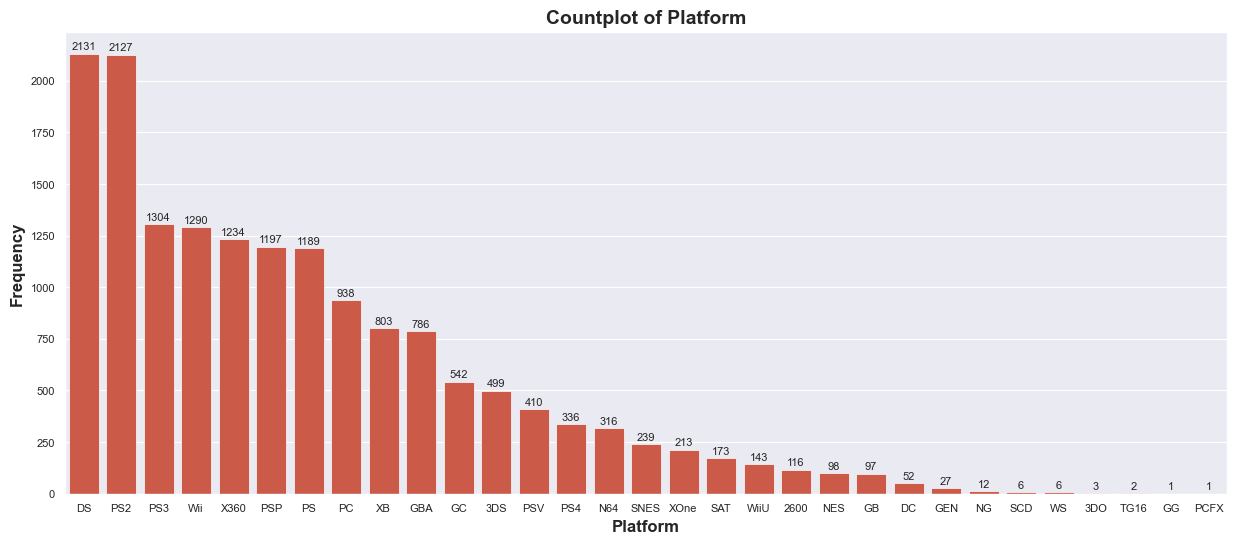

In [9]:
#define figure size
fig = plt.figure(figsize=(15, 6))

#build frequency series to order the countplot
platform_freq = data['Platform'].value_counts()

#build countplot
ax = sns.countplot(data=data, x="Platform", order=platform_freq.index)

# Add count labels to the bars
for p in ax.patches:                                                   #ax.patches returns a list of all the graphical elements (which are the bars)
    ax.annotate(int(p.get_height()),                                   #display the value as the height of each bar (frequency)
                (p.get_x() + p.get_width() / 2., p.get_height()),      #xy coordinate for the point annotated (not where the text is located)
                ha = 'center',                                         #horizontal alignmet
                va = 'center',                                         #vertical alignment
                xytext = (0, 5),                                       #the location of the text annotation 
                textcoords = 'offset points',                          #set text position to be offset from the xy coordinate
                fontsize = 8)                                          #fontsize

# Set the axis labels and title
plt.xlabel('Platform', fontweight="bold", fontsize=12)
plt.ylabel('Frequency', fontweight="bold", fontsize=12)
plt.title('Countplot of Platform', fontweight="bold", fontsize=14)

#format x and y ticks
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

#display the chart
plt.show()

Oooo! So this count plot that we have right here shows the number of games available on each of these platforms. We can see that DS and PS2 are the clear winners in this regard. So if you're looking to get a platform to enjoy as many types of games as possible, consider these two options. 

## Pie Chart

Before we move on to our next variable, I'd like explore another type of data visualization for categorical variables, the **pie chart**. The pie chart allows us to have a better idea of the proportion of each bar relative to each other. The implementation can also be very simple, but let's be a little more fancy here.

First, we'll have to address a common issue in pie charts, small categories. As we can see from the count plot above, there are some platforms with very small counts. If we do not combine these small platforms into one, the pie chart would be super crowded. The downside with this approach is loss of information, but we'll do it anyways for aesthetics. In this case, I've combined all platforms with frequency less than 200 into a single category. Feel free to explore other thresholds to your liking, but I think 200 is about right. 

We'll also change the color and the degree of `explode` based on each pie's proportion. This will make it look pretty cool as it stands out the larger pies more. While this step is totally unnecessary (some may even argue that this is bad practice as it makes the visualization look hard to read), I'm just here to explore and play with the different available arguments. Again, you may refer to the comments in the code for explanation of what each line of code does.

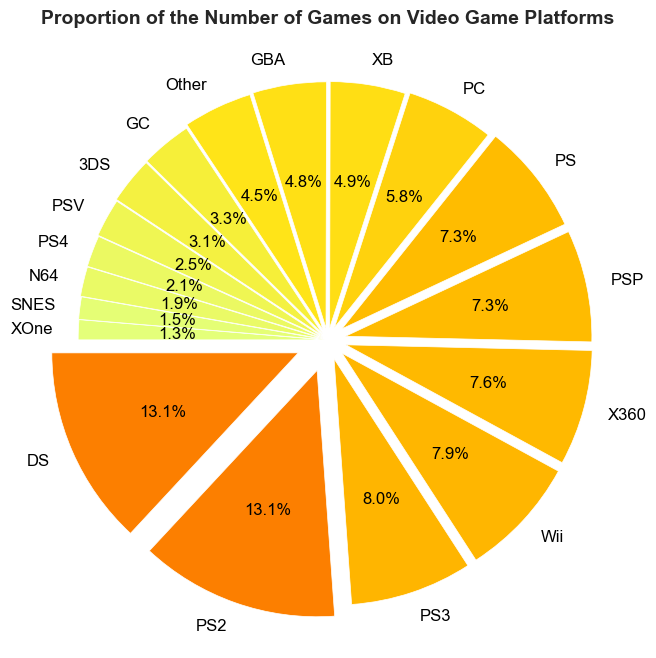

In [10]:
#define figure size
fig = plt.figure(figsize=(12, 8))

#set a threshold for collapsing small categories
threshold = 200

#collapse small categories into a single group
small_categories = platform_freq[platform_freq < threshold]
platform_freq['Other'] = platform_freq[small_categories.index].sum()
platform_freq.drop(small_categories.index, inplace=True)

#sort the values of the platform series such that the new `Other` category is placed in order
platform_freq = platform_freq.sort_values()

#calculate the proportions of each platform
proportions = platform_freq / platform_freq.sum()

#define colormap based on proportions
cmap = plt.colormaps.get_cmap('Wistia')
norm = mcolors.Normalize(vmin=proportions.min(), vmax=proportions.max())
colors = cmap(norm(proportions))

#create a pie chart
plt.pie(platform_freq,                                              #pie chart for platform_freq
        labels=platform_freq.index,                                 #set the label as the index of platform_freq
        autopct='%1.1f%%',                                          #format the label as a percentage
        explode = proportions,                                      #set the degree of explode to each pie's proportion
        colors = colors,                                            #set the color of each pie to the cmap defined above
        textprops={'color': "Black", 'fontsize': 12},               #format label
        startangle=180, counterclock=False)                         #define the starting point and direction of the pie

#set the title
plt.title('Proportion of the Number of Games on Video Game Platforms', fontweight="bold", fontsize=14)

#customize the plot using Seaborn
sns.set_style('white')

#display the chart
plt.show()

# *Year*

Phew! That was a lot of fun, but it's time to move on. Next in line we have the *Year* variable. As you can probably imagine, there's a lot we can do with a time-series variable, but let's not get too ahead of ourselves. First, let's treat *Year* almost like a categorical variable and build a count plot off of it. This count plot will give us an idea of the number of games produced over the years. But it's actually better practice to visualize time-series variable with a **line plot**, so let's do that instead.

What's interesting here is that we can artificially create the x-axis and y-axis by combining the use of `sns.set_style("white")` and `sns.despine(left=False, bottom=False)`. I tried other styles but it doesn't seem to work with the `despine()` method. In case you haven't already understood the purpose of the `despine()` method, it removes the spines (borders) of our chart. By setting `left=False` and `bottom=False`, we retain the left and bottom spine, which creates the illusion of a x and y axis.

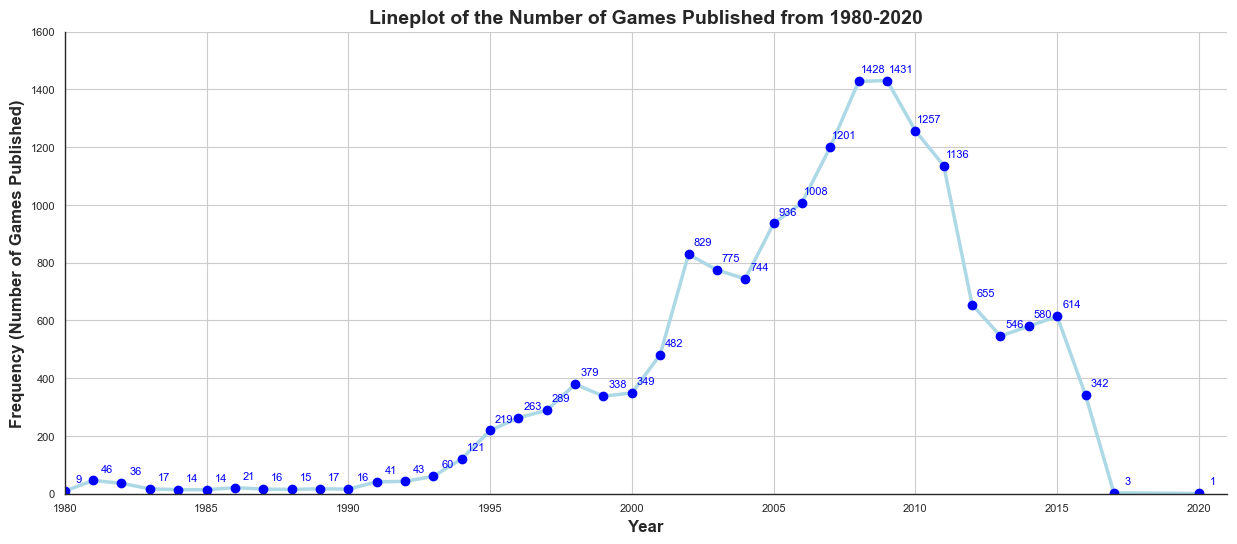

In [11]:
#define figure size
fig = plt.figure(figsize=(15, 6))

#set seaborn style as white
sns.set_style("white")

#set up series for frequency of each Year
year = data["Year"].value_counts()

#build line plot
ax = sns.lineplot(x=year.index, y=year, lw=2.5, color="lightblue")

#add marker (the dots) and label 
for i, (x_coor, y_coor) in enumerate(year.items()):         #loop over the year frequency series and we can get the xy coordinate for each data point
    plt.plot(x_coor, y_coor, marker='o', color='blue')      #plot a blue dot on each data point
    plt.annotate(y_coor,                                    #also label that data point with the y-value (frequency)
                 xy=(x_coor, y_coor),                       #point to annotate
                 xytext=(x_coor+0.5, y_coor+40),            #position of text
                 fontsize=8,                                #font size
                 color='blue',                              #color of text
                 ha="center",                               #vertical alignment
                 va="center")                               #vertical alignment

#retain the bottom and left spine to create x and y axis
sns.despine(left=False, bottom=False)

#set limits for x and y values
plt.xlim(1980, 2021)
plt.ylim(0, 1600)

# Add labels and title
plt.xlabel("Year", fontweight="bold", fontsize=12)
plt.ylabel("Frequency (Number of Games Published)", fontweight="bold", fontsize=12)
plt.title("Lineplot of the Number of Games Published from 1980-2020", fontweight="bold", fontsize=14)

#format x and y ticks
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

#turn on grid
plt.grid(True)

#display the figure
plt.show()

Looking really good! The line plot is clearly presented and labeled. What else would you change about this plot? Feel free to comment below! Anyways, we can see that the number of games published peaked around 2008-2009. Ever since, there has been a significant drop in the number. No matter what the reason is to this phenomenon, it appears that the gaming industry is currently going on a downhill trend.

Now you might be wondering "What about the trend of sales over these 40 years?". Just because the number of games published have been going downhill doesn't mean that sales is too. Maybe the recently published games are of much higher quality, so even though quantity is decreasing, quality is actually going up. Ok, let's try to visualize exactly that then. Let's see how *Global_Sales* have fluctuated over these 40 years.

The code below is pretty much identical as the one on top with some slight modifications here and there. Instead of `year` series, we have to construct a new series for *Global_Sales*. This can be easily down using the `groupby()` method followed by the `sum()` method to aggregate *Global_Sales* by the *Year* value.

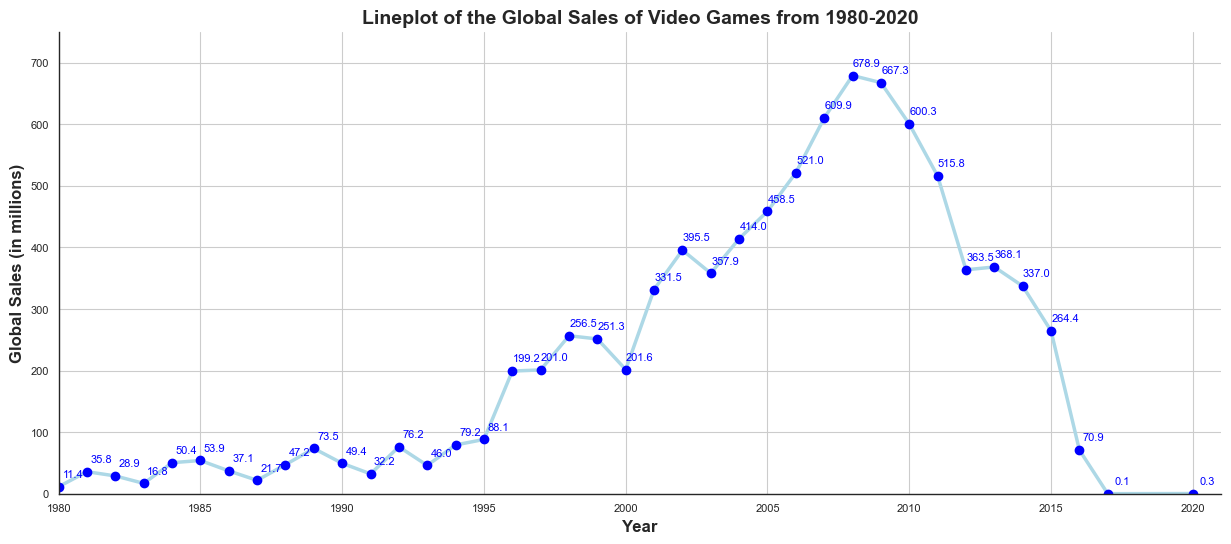

In [12]:
#define figure size
fig = plt.figure(figsize=(15, 6))

#group Global_Sales by the Year
global_sales_by_year = data.groupby(['Year']).sum(numeric_only=True)["Global_Sales"]

#plot linegraph of Global_Sales
ax = sns.lineplot(x=global_sales_by_year.index, y=global_sales_by_year, lw=2.5, color="lightblue")

#add marker (the dots) and label 
for i, (x_coor, y_coor) in enumerate(global_sales_by_year.items()):
    plt.plot(x_coor, y_coor, marker='o', color='blue')
    plt.annotate(format(y_coor, '.1f'), 
                 xy=(x_coor, y_coor), 
                 xytext=(x_coor+0.5, y_coor+20), 
                 fontsize=8, 
                 color='blue', 
                 ha="center", 
                 va="center")
    
#retain the bottom and left spine to create x and y axis
sns.despine(left=False, bottom=False)

#set limits for x and y values
plt.xlim(1980, 2021)
plt.ylim(0, 750)

# Add labels and title
plt.xlabel("Year", fontweight="bold", fontsize=12)
plt.ylabel("Global Sales (in millions)", fontweight="bold", fontsize=12)
plt.title("Lineplot of the Global Sales of Video Games from 1980-2020", fontweight="bold", fontsize=14)

#format x and y ticks
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

#turn on grid
plt.grid(True)

#display the plot
plt.show()

Hmm...Okay, so it appears that the trend for *Global_Sales* is approximately the same as the the trend for the number of games published. But we have to be aware that the scale for these two lineplots are different. Is there any better way to visualize the correlation or pattern between these trends? Yes! We can use a **dual-axis lineplot**. Let's take a look at this visualization. 

First, we'll merge the two series `Year` and `global_sales_by_year` into a dataframe.

In [13]:
#merge year and global_sales_by_year
merged_df = pd.merge(year, global_sales_by_year, right_index = True, left_index = True)
merged_df.head()

,count,Global_Sales
Year,,
2009.0,1431,667.30
2008.0,1428,678.90
2010.0,1257,600.29
2007.0,1201,609.92
2011.0,1136,515.80


Then we can create a dual-axis lineplot, with `Year` taking the y-axis on the left side and `Global_Sales` taking the y-axis on the right side. Now, even though the two variables are of different scale, we can still put them side-by-side for a clear and easy comparison.

To create a dual-axis plot, all we have to do is ensure that two axis object share the same x-axis. We can accomplish this by setting `ax2 = ax1.twinx()` as you'll find in the code below. Then we just have to plot our two y variables and assign it to `ax1` and `ax2` correspondingly. The hardest part I found with plotting a dual-axis plot like this is ensuring that the yaxis ticks are consistent and that the grid doesn't collide. So what I did was I first turned off the grid for `ax2`. Then I manually set the yticks of both `ax1` and `ax2` such that they remain proportionately consistent. With these simple tricks, we derive a beautiful dual-axis lineplot with consistent yticks on both sides!

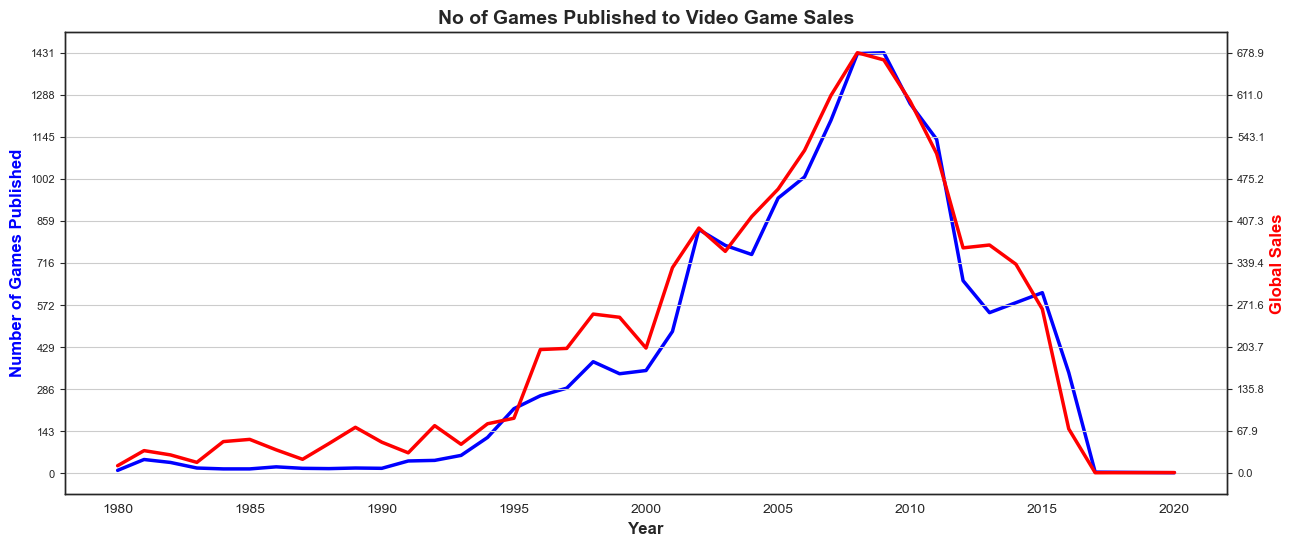

In [26]:
#define x and our two y variables
merged_year = merged_df.index
merged_count = merged_df['count']
merged_global_sales_by_year = merged_df['Global_Sales']

#create a figure and an axis object, and define the figure size
fig, ax1 = plt.subplots(figsize=(15, 6))

#plot the first set of data on the left axis
ax1 = sns.lineplot(x=merged_year, y=merged_count, lw=2.5, color="blue")

#define x label, left y axis title and title
ax1.set_xlabel('Year', fontweight="bold", fontsize=12)
ax1.set_ylabel('Number of Games Published', color='blue', fontweight="bold", fontsize=12)
ax1.set_title("No of Games Published to Video Game Sales", fontweight="bold", fontsize=14)

#create a second axis object that shares the same x-axis with the first axis
ax2 = ax1.twinx()

#plot the second set of data on the right axis
ax2 = sns.lineplot(x=merged_year, y=merged_global_sales_by_year, lw=2.5, color="red")

#define right y axis title
ax2.set_ylabel('Global Sales', color='red', fontweight="bold", fontsize=12)

#turn off grid for right axis
ax2.grid(None)

#set the y-axis tick marks of ax1
ax1.set_yticks(np.arange(0, max(merged_count.values) + 0.1*max(merged_count.values), max(merged_count.values)/10))
#set the y-axis tick marks of ax2 to correspond to the y-values of var2 at the positions of the tick marks of ax1
ax2.set_yticks(np.arange(0, max(merged_global_sales_by_year.values)+ 0.1*max(merged_global_sales_by_year.values), max(merged_global_sales_by_year.values)/10))

#format x and y ticks
plt.xticks(fontsize=8)
ax1.tick_params(axis='y', labelsize=8)
ax2.tick_params(axis='y', labelsize=8)

#display the plot
plt.show()

With this dual-axis lineplot, the correlation between the two variables becomes very clear. We can see that there seems to be a direct link between the number of games published and the global sales of games. 

# *Genre*

Time to move on! Next we have the *Genre* variable. Like *Platform*, *Genre* is a categorical variable, and so we'll just visualize it with a count plot. We'll save time here, so you can try it on your own to create a pie chart for *Genre*. The code below is pretty much identical with the code used for *Platform*.

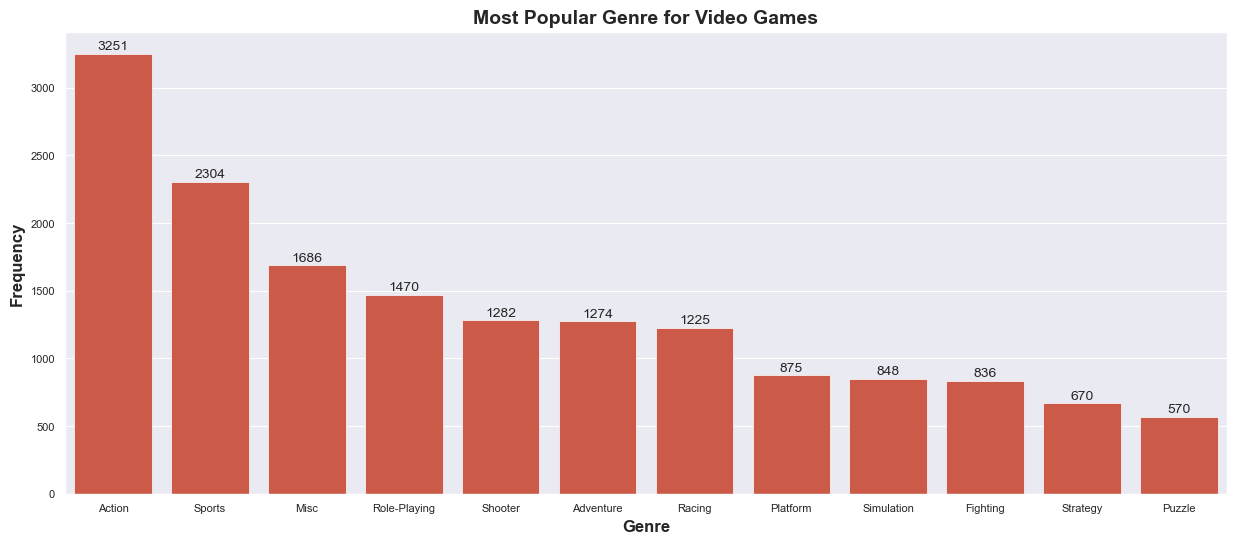

In [27]:
#define figure size
fig = plt.figure(figsize=(15, 6))

#set seaborn style back to darkgrid
sns.set_style("darkgrid")

#genre frequency series
genre_freq = data['Genre'].value_counts()

#plot count plot and order in descending order
ax = sns.countplot(data=data, x="Genre", order=genre_freq.index)

#add count labels to the bars
for p in ax.patches:
    ax.annotate(int(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height() - 50), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points',
                fontsize = 10)

# st the axis labels and title
plt.xlabel('Genre', fontweight="bold", fontsize=12)
plt.ylabel('Frequency', fontweight="bold", fontsize=12)
plt.title('Most Popular Genre for Video Games', fontweight="bold", fontsize=14)

#format x and y ticks
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

#display the plot
plt.show()

Action, Sports and Misc came out as the top three most popular genres. Not too surprising since they probably bring in the most money as well. Puzzle, Strategy and Fighting came in as the least popular genres. 

# *Publisher*

We'll plot the same count plot for Publisher, since it's also just another categorical variable. The only difference is that we have a lot of publishers, many of them publishing only a few games. So let's group the smaller publishers into one category like we did for the pie chart.

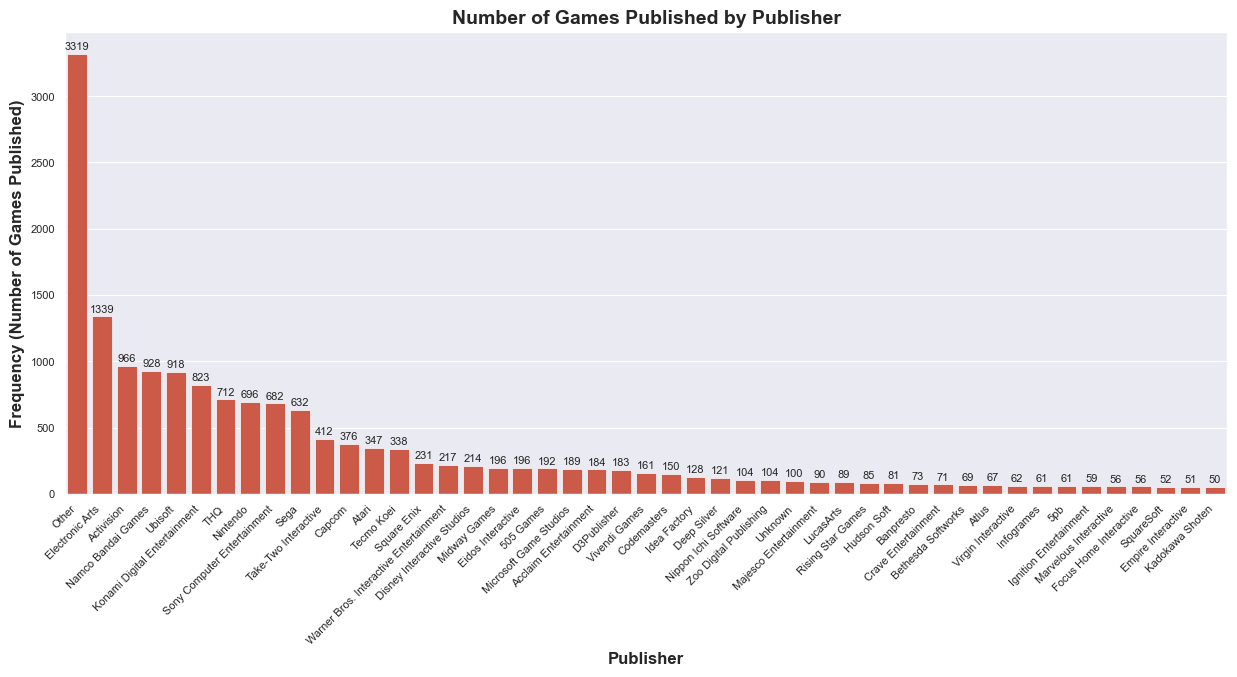

In [30]:
#define figure size
fig = plt.figure(figsize=(15, 6))

#publisher frequency series
publisher_freq = data['Publisher'].value_counts()

#set a threshold for collapsing small categories
threshold = 50

#collapse small categories into a single group
small_categories = publisher_freq[publisher_freq < threshold]
publisher_freq['Other'] = publisher_freq[small_categories.index].sum()
publisher_freq.drop(small_categories.index, inplace=True)

#sort the series so that 'Other' is placed in right order
publisher_freq = publisher_freq.sort_values(ascending=False)

#plot the count plot in order
ax = sns.barplot(x=publisher_freq.index, y=publisher_freq.values, order=publisher_freq.index)

# Add count labels to the bars
for p in ax.patches:
    ax.annotate(int(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height() - 50), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points',
                fontsize = 8)

# Set the axis labels and title
plt.xlabel('Publisher', fontweight="bold", fontsize=12)
plt.ylabel('Frequency (Number of Games Published)', fontweight="bold", fontsize=12)
plt.title('Number of Games Published by Publisher', fontweight="bold", fontsize=14)

#format x and y ticks
plt.xticks(rotation=45, fontsize=8, ha="right")
plt.yticks(fontsize=8)

#display the plot
plt.show()

We can see that the *Other* category, which was collapsed from the smaller categories, actually came in, indisputably, as the top publisher of games. This means that in the video game industry, we have many a lot of small publishers, each contributing a little bit to the big menu of games. Electronic Arts, Activision and Namco Bandai Games came in 2nd, 3rd and 4th. Nintendo, the publisher with the most successful games (as we saw in the top ten best selling games) actually came in 7th place, with 696 games. 

# Regional Sales over Time

Awesome! Next, we have the breakdown sales for the NA, EU, JP and Other regions. While we could try to visualize and compare the total sales in each of these four regions, but what's the fun in that? Let's make things a little bit more complicated by adding a time-series element into our visualization. Let's see if we can identify any trends in these four markets over time in terms of sales.

First, we'll construct a dataframe by combining four series, each representing the sales of one region over time.

In [31]:
#define a series for each region's sales over time
NA_sales_by_year = data.groupby(['Year']).sum(numeric_only=True)["NA_Sales"]
EU_sales_by_year = data.groupby(['Year']).sum(numeric_only=True)["EU_Sales"]
JP_sales_by_year = data.groupby(['Year']).sum(numeric_only=True)["JP_Sales"]
Other_sales_by_year = data.groupby(['Year']).sum(numeric_only=True)["Other_Sales"]

#combine the four series into a df
sales_by_region = pd.concat([NA_sales_by_year, EU_sales_by_year, JP_sales_by_year, Other_sales_by_year], axis=1)
sales_by_region.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year,,,,
1980.0,10.59,0.67,0.00,0.12
1981.0,33.40,1.96,0.00,0.32
1982.0,26.92,1.65,0.00,0.31
1983.0,7.76,0.80,8.10,0.14
1984.0,33.28,2.10,14.27,0.70


And with this dataframe, we can utilize the `plot()` method of a dataframe to construct a **multiple line plot** with ease.

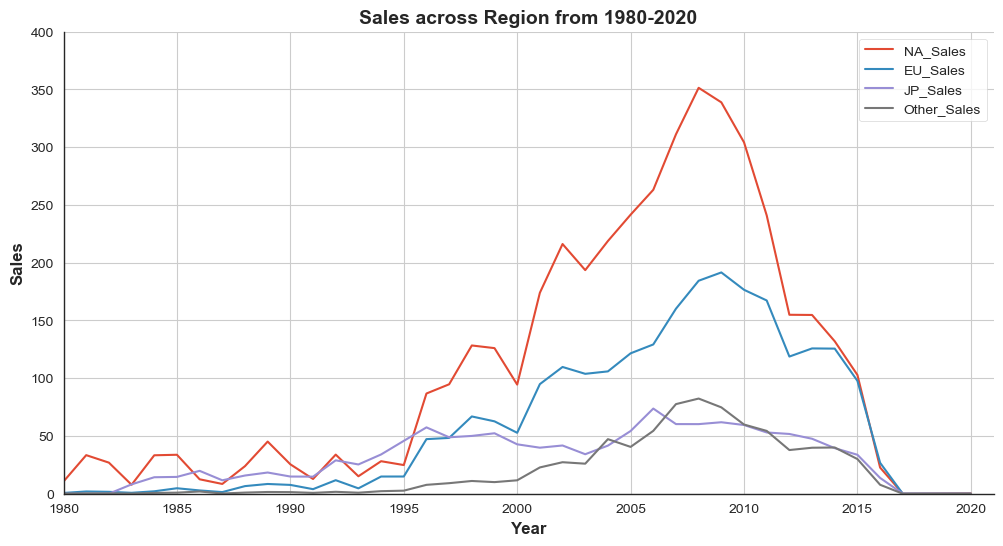

In [32]:
#set seaborn style
sns.set_style("white")

#plot dataframe as a line plot (it will plot all four variables)
sales_by_region.plot(kind="line", figsize=(12, 6))

#retain the bottom and left spine to create x and y axis
sns.despine(left=False, bottom=False)

#set limits for x and y values
plt.xlim(1980, 2021)
plt.ylim(0, 400)

#set axis labels and titles
plt.xlabel('Year', fontweight="bold", fontsize=12)
plt.ylabel('Sales', fontweight="bold", fontsize=12)
plt.title('Sales across Region from 1980-2020', fontweight="bold", fontsize=14)

#turn on grid
plt.grid(True)

#display the plot
plt.show()

Woohoo! With this plot, we can examine the development of the gaming industry in the different regions. We can see that the Japanese market actually took off quite early, beating the European market in the earlier years. But possibly due to the limitations of market size, the European market eventually surpassed the Japanese market at around 1997. The remaining global market (Other_Sales) also begin to take off in 2000. 

# Genre Sales over Time

Looking at the plot above is starting to make me wonder whether we can observe other patterns over time. For instance, "Has genre preferences for video games changed over the past 40 years?" To answer this curiousity, we can simply switch from plotting lines for regions to plotting lines for genres. Let's do exactly that!

Here, I've utilized a pivot table to construct the dataframe of genre sales over time. It does the same job as combining series but with less code. For any missing values, we'll just fill it with 0.

In [33]:
#construct a pivot table
data_pivot = pd.pivot_table(data, values='Global_Sales', index='Year', columns='Genre', aggfunc='sum')
#fill in 0 for missing values
data_pivot.fillna(0, inplace=True)

data_pivot.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980.0,0.34,0.0,0.77,2.71,0.00,0.00,0.00,0.0,7.07,0.00,0.49,0.0
1981.0,14.84,0.0,0.00,0.00,6.93,2.24,0.48,0.0,10.04,0.45,0.79,0.0
1982.0,6.52,0.0,0.00,0.87,5.03,10.03,1.57,0.0,3.79,0.00,1.05,0.0
1983.0,2.86,0.4,0.00,2.14,6.93,0.78,0.00,0.0,0.48,0.00,3.20,0.0
1984.0,1.85,0.0,0.00,1.45,0.69,3.14,5.95,0.0,31.10,0.00,6.18,0.0


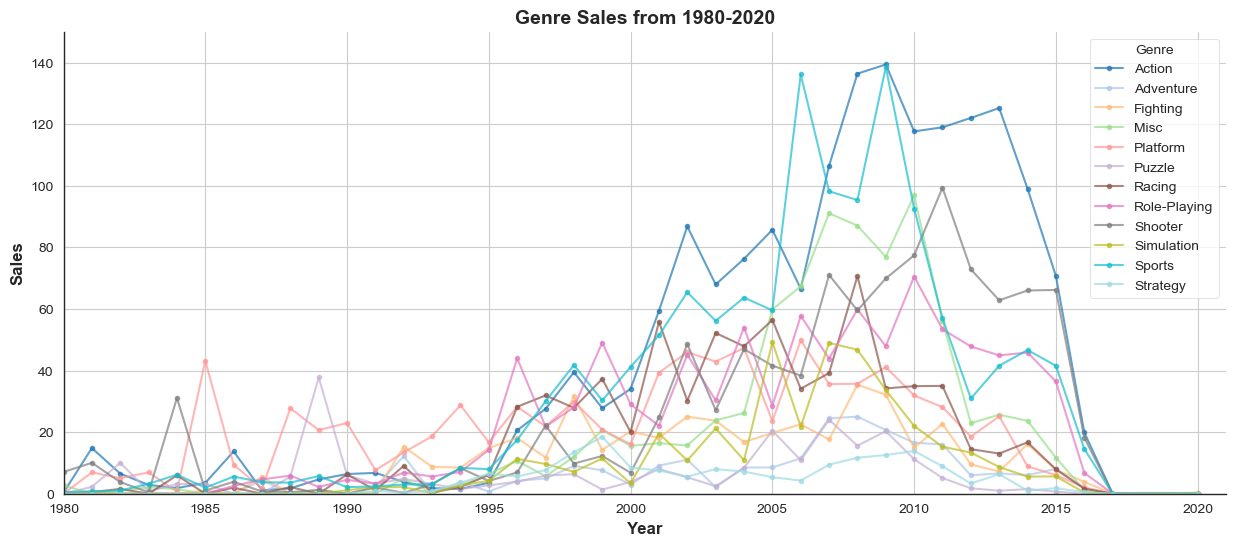

In [34]:
#define colormap
colormap = plt.get_cmap('tab20', len(data_pivot.columns))

#plot multiple line plot
data_pivot.plot(kind="line", figsize=(15, 6), colormap=colormap, marker=".", alpha=0.7)

#retain the bottom and left spine to create x and y axis
sns.despine(left=False, bottom=False)

#set limits for x and y values
plt.xlim(1980, 2021)
plt.ylim(0, 150)

#set axis labels and titles
plt.xlabel('Year', fontweight="bold", fontsize=12)
plt.ylabel('Sales', fontweight="bold", fontsize=12)
plt.title('Genre Sales from 1980-2020', fontweight="bold", fontsize=14)

#turn on grid
plt.grid(True)

#display the plot
plt.show()

It's a little bit messy since we have 11 different lines on our plot, but we could still manage to derive some insights. We can see in the early ages of gaming development, there were spikes in the Shooter, Platform and Puzzle department. These were all relatively simple games to make with the technology at the time. But as technology advances, more and more action and graphics-heavy games were born, sparking the growth in these departments.

# Sales by Publishers (Top Ten) over Time

Now, if we can compare the trend of *Genre* over time, we can surely also compare the trend of *Publisher* and *Platforms*, our other two categorical variables, over time. But since we have quite a lot of publishers and platforms in our dataset, let's limit ourselves to visualizing the top ten for each. First, we'll have to extract the top ten publisher and platform by *Global_Sales* and then we'll repeat the steps to replicate the multiple line plot.

In [35]:
#get the top ten publisher by Global_Sales
Global_Sales_by_Publisher = data.groupby(['Publisher']).sum(numeric_only=True)["Global_Sales"].sort_values(ascending = False)
top_ten_publisher_by_sales = Global_Sales_by_Publisher[:10].index

top_ten_publisher_by_sales

Index(['Nintendo', 'Electronic Arts', 'Activision',
       'Sony Computer Entertainment', 'Ubisoft', 'Take-Two Interactive', 'THQ',
       'Konami Digital Entertainment', 'Sega', 'Namco Bandai Games'],
      dtype='object', name='Publisher')

In [36]:
#retain the rows with the top ten publishers 
data_top_ten_publisher = data[data['Publisher'].isin(top_ten_publisher_by_sales)]
data_top_ten_publisher.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [37]:
#create pivot table and fill in missing value
data_pivot_publisher = pd.pivot_table(data_top_ten_publisher, values='Global_Sales', index='Year', columns='Publisher', aggfunc='sum')
data_pivot_publisher.fillna(0, inplace=True)

data_pivot_publisher.head()

Publisher,Activision,Electronic Arts,Konami Digital Entertainment,Namco Bandai Games,Nintendo,Sega,Sony Computer Entertainment,THQ,Take-Two Interactive,Ubisoft
Year,,,,,,,,,,
1980.0,3.02,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
1981.0,8.50,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
1982.0,1.86,0.0,0.0,0.00,0.00,0.4,0.0,0.0,0.0,0.0
1983.0,1.94,0.0,0.0,0.00,10.96,0.0,0.0,0.0,0.0,0.0
1984.0,0.27,0.0,0.0,3.43,45.56,0.0,0.0,0.0,0.0,0.0


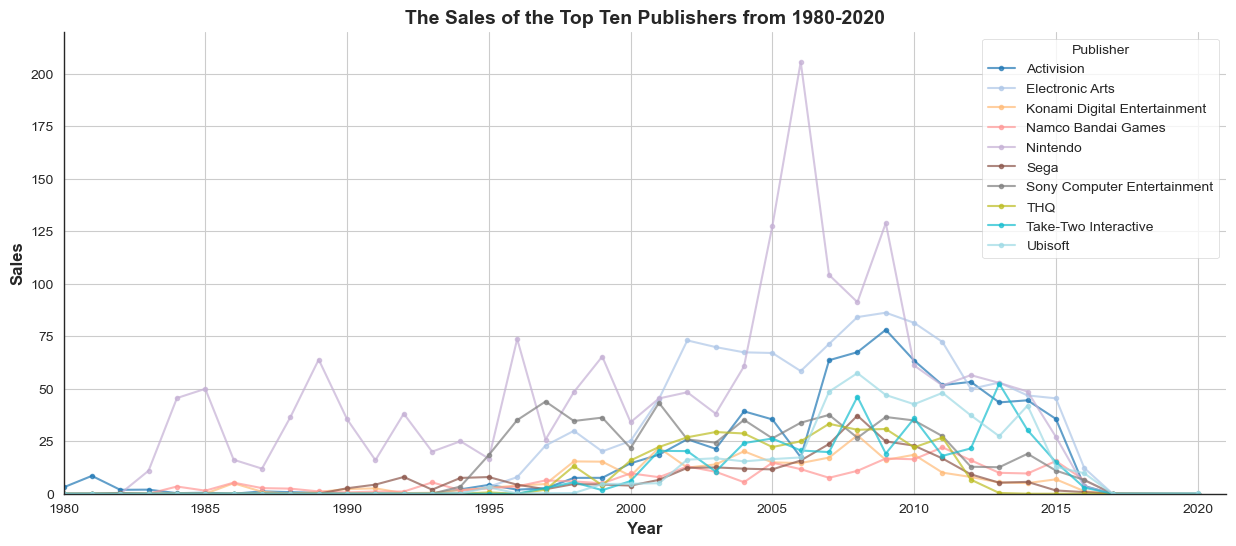

In [38]:
#define colormap
colormap = plt.get_cmap('tab20', len(data_pivot.columns))

#plot multiple line plot
data_pivot_publisher.plot(kind="line", figsize=(15, 6), colormap=colormap, marker=".", alpha=0.7)

#retain the bottom and left spine to create x and y axis
sns.despine(left=False, bottom=False)

#set limits for x and y values
plt.xlim(1980, 2021)
plt.ylim(0, 220)

#set axis labels and titles
plt.xlabel('Year', fontweight="bold", fontsize=12)
plt.ylabel('Sales', fontweight="bold", fontsize=12)
plt.title('The Sales of the Top Ten Publishers from 1980-2020', fontweight="bold", fontsize=14)

#turn on grid
plt.grid(True)

#display the plot
plt.show()

Ta da! We can see that Nintendo started off really early, consistently pumping out significant sales since the 1980s. Sony and Electronic Arts followed suit at around 1995. Unfortunately for Sony, their sales basically peaked during their inception stage. Activision and Take-Two Interactive came to their rise in more recent times.

# Sales by Platform (Top Ten) over Time

Subsequently, let's apply the same procedures to visualize the sales trend for the top ten platforms.

In [39]:
#get the top ten platforms by Global_Sales
Global_Sales_by_Platform = data.groupby(['Platform']).sum(numeric_only=True)["Global_Sales"].sort_values(ascending = False)
top_ten_platform_by_sales = Global_Sales_by_Platform[:10].index

top_ten_platform_by_sales

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PSP', 'PS4', 'PC'], dtype='object', name='Platform')

In [40]:
#retain the rows with the top ten publishers 
data_top_ten_platforms = data[data['Platform'].isin(top_ten_platform_by_sales)]
data_top_ten_platforms.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02


In [41]:
#create pivot table and fill in missing value
data_pivot_platform = pd.pivot_table(data_top_ten_platforms, values='Global_Sales', index='Year', columns='Platform', aggfunc='sum')
data_pivot_platform.fillna(0, inplace=True)

data_pivot_platform.head()

Platform,DS,GBA,PC,PS,PS2,PS3,PS4,PSP,Wii,X360
Year,,,,,,,,,,
1985.0,0.02,0.0,0.03,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1988.0,0.00,0.0,0.03,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1992.0,0.00,0.0,3.02,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1994.0,0.00,0.0,12.85,6.02,0.0,0.0,0.0,0.0,0.0,0.0
1995.0,0.00,0.0,4.23,35.92,0.0,0.0,0.0,0.0,0.0,0.0


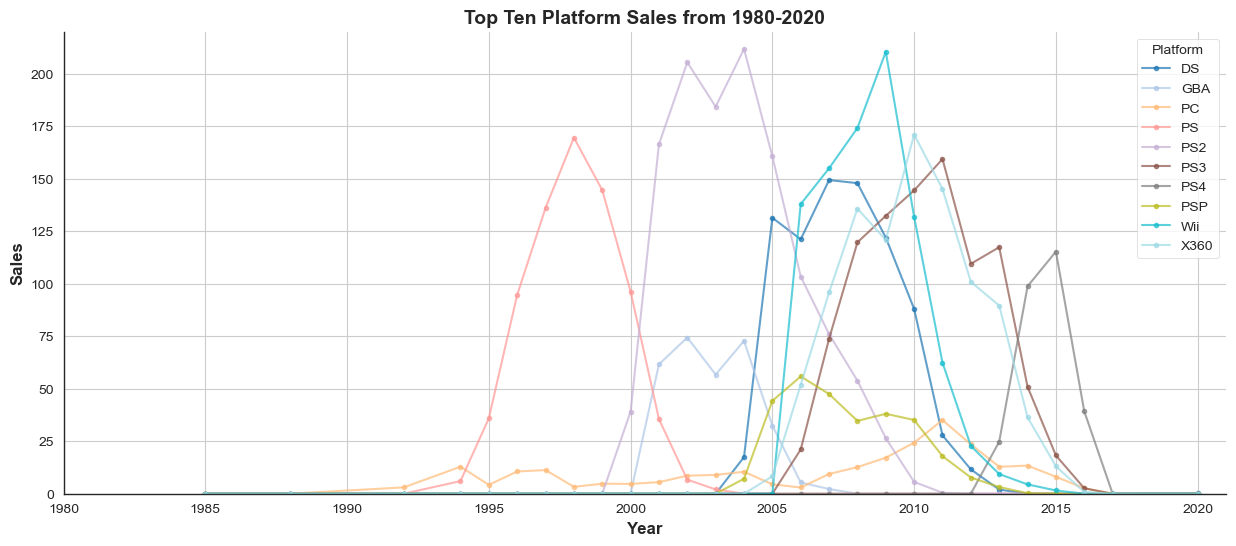

In [42]:
#define colormap
colormap = plt.get_cmap('tab20', len(data_pivot.columns))

#plot multiple line plot
data_pivot_platform.plot(kind="line", figsize=(15, 6), colormap=colormap, marker=".", alpha=0.7)

#retain the bottom and left spine to create x and y axis
sns.despine(left=False, bottom=False)

#set limits for x and y values
plt.xlim(1980, 2021)
plt.ylim(0, 220)

plt.xlabel('Year', fontweight="bold", fontsize=12)
plt.ylabel('Sales', fontweight="bold", fontsize=12)
plt.title('Top Ten Platform Sales from 1980-2020', fontweight="bold", fontsize=14)

#turn on grid
plt.grid(True)

#display the plot
plt.show()

Oooo! We can see some very clear ups and downs for platform sales trend. The first generation PlayStation was the first real video game platform with excellent sales. But as newer generations (PS2, PS3 and PS4) were released, the sales were quickly transitioned to the newer generations. The performance of PS3 and PS4 were, however, weak and in a state of decline, especially when you compare them to the first two generations. This could be a signal that PlayStation is slowly becoming a thing of the past. From 2005 to 2010, we also see a boost in other platforms like Wii, DS and X360. 

# Regional Market Share for Genre

Wow! That was great! You can see the power of these simple data visualizations. What other questions do you have regarding the sales of the video gaming industry? For me, I'm also curious whether we could identify any patterns in regards to the different regions. In particular, "Do the different regions have different genre preferences?". We can explore this question by building a **multiple bar plot**.

We'll build a dataframe that contains the aggregate sales for each genre of the four regions. 

In [43]:
#get the aggregate sales for each genre of the four regions
NA_Sales_by_genre = data.groupby(['Genre']).sum(numeric_only=True)["NA_Sales"]
EU_Sales_by_genre = data.groupby(['Genre']).sum(numeric_only=True)["EU_Sales"]
JP_Sales_by_genre = data.groupby(['Genre']).sum(numeric_only=True)["JP_Sales"]
Other_Sales_by_genre = data.groupby(['Genre']).sum(numeric_only=True)["Other_Sales"]

#combine the four series into a dataframe
region_sales_by_genre_df = pd.concat([NA_Sales_by_genre, EU_Sales_by_genre, JP_Sales_by_genre, Other_Sales_by_genre], axis=1)
region_sales_by_genre_df

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,861.77,516.48,158.65,184.92
Adventure,101.93,63.74,51.99,16.70
Fighting,220.74,100.00,87.15,36.19
Misc,396.92,211.77,106.67,73.92
Platform,445.99,200.65,130.65,51.51
Puzzle,122.01,50.52,56.68,12.47
Racing,356.93,236.31,56.61,76.68
Role-Playing,326.50,187.57,350.29,59.38
Shooter,575.16,310.45,38.18,101.90


Then we can create a multiple bar plot by adding the bars of each region into their respective positions. You can see how this is implemented in the code below.

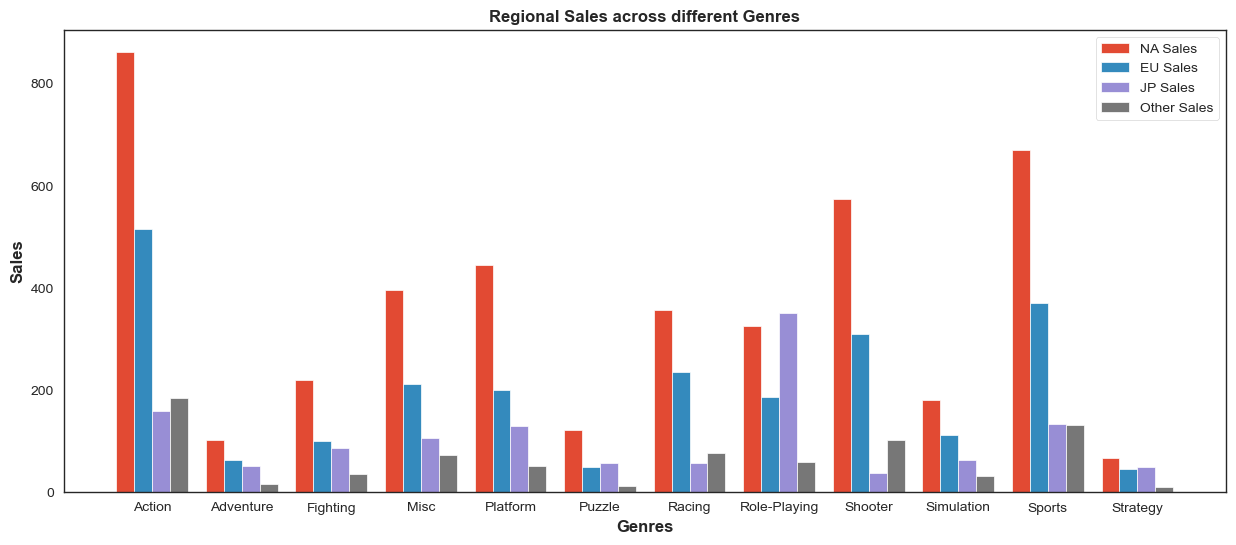

In [44]:
#assign each region to a variable for a easier reference
genre = region_sales_by_genre_df.index
na_sales = region_sales_by_genre_df.NA_Sales
eu_sales = region_sales_by_genre_df.EU_Sales
jp_sales = region_sales_by_genre_df.JP_Sales
other_sales = region_sales_by_genre_df.Other_Sales

#set the width of the bars
bar_width = 0.2

#create a figure and axis object
fig, ax = plt.subplots(figsize=(15, 6))

#define the position of each bar by shifting the bars relative to x_positions
x_positions = np.arange(len(genre))
bar1_position = [p - 1.5*bar_width for p in x_positions] 
bar2_position = [p - 0.5*bar_width for p in x_positions]
bar3_position = [p + 0.5*bar_width for p in x_positions]
bar4_position = [p + 1.5*bar_width for p in x_positions]

#create the first set of bars
bar1 = ax.bar(bar1_position, na_sales, bar_width, label='NA Sales')

#create the second set of bars
bar2 = ax.bar(bar2_position, eu_sales, bar_width, label='EU Sales')

#create the third set of bars
bar3 = ax.bar(bar3_position, jp_sales, bar_width, label='JP Sales')

#create the fourth set of bars
bar4 = ax.bar(bar4_position, other_sales, bar_width, label='Other Sales')

# Add legend, axis labels and title
ax.set_xlabel('Genres', fontweight="bold", fontsize=12)
ax.set_ylabel('Sales', fontweight="bold", fontsize=12)
ax.set_title('Regional Sales across different Genres', fontweight="bold", fontsize=12)
ax.legend()

#place the x_ticks on x_positions
plt.xticks(x_positions, genre)

#display the plot
plt.show()

Hmmm...while we can indeed see some unusual trends, it's not very obvious from this multiple bar plot. Perhaps, it's better we could construct a **multiple pie chart** to get a more accurate idea of regional proportions for each genres. Let's do exactly that! This implementation is also not hard. We just have to create a subplot that can accomodate for the number of genres available and then, one-by-one, plug a pie chart into each `ax`.

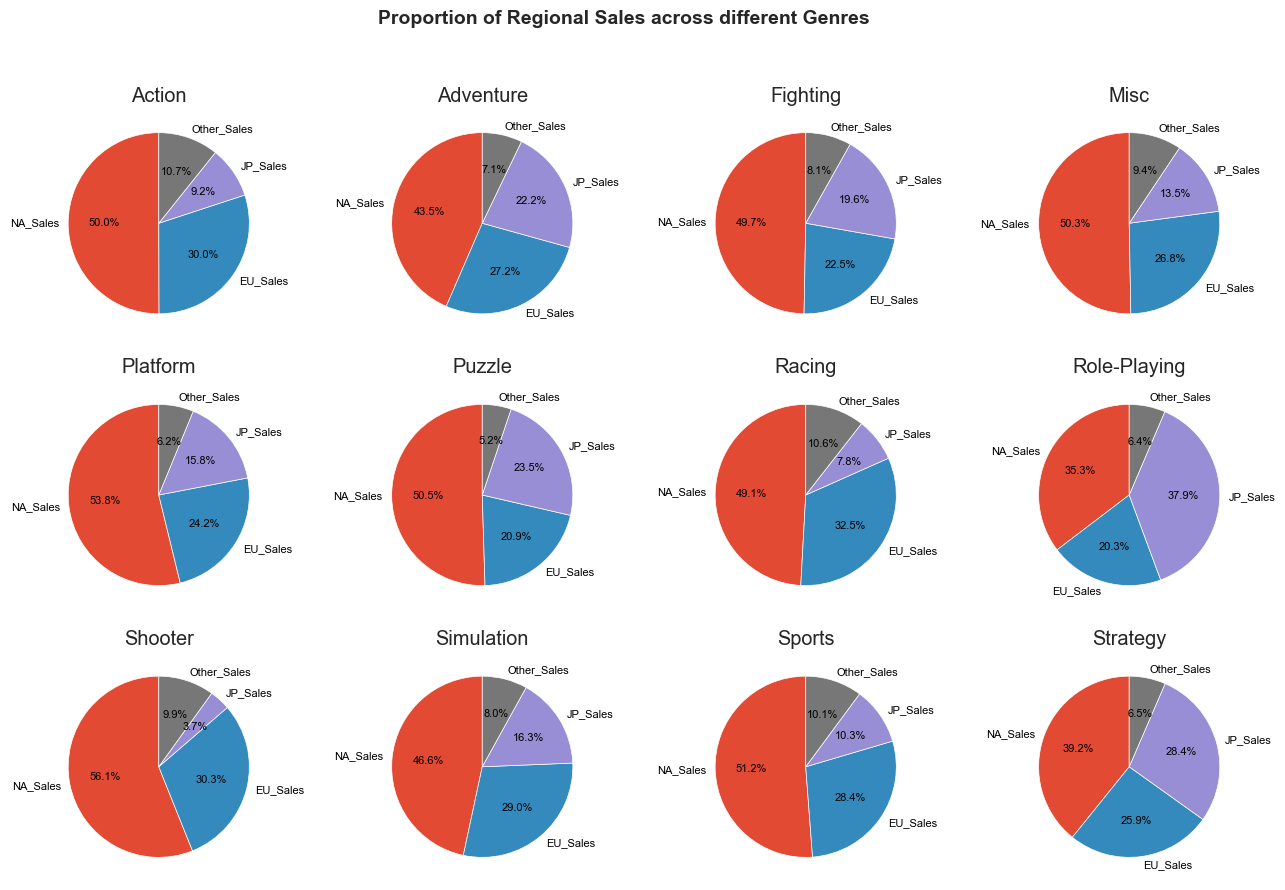

In [45]:
#create a 3x4 grid of subplots
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))

#flatten the ax array so that we can iterate over it
ax = ax.flatten()

#define counter
i = 0
#loop over each row in the dataframe
for index, row in region_sales_by_genre_df.iterrows():
    
    #plot the pie chart
    ax[i].pie(row.values, 
              labels=region_sales_by_genre_df.columns, 
              autopct='%1.1f%%', 
              startangle=90, 
              textprops={'color': "Black", 'fontsize': 8})
    
    #set the title for each individual pie chart
    ax[i].set_title(index)
    #update counter
    i += 1

#set super title
fig.suptitle('Proportion of Regional Sales across different Genres', fontweight="bold", fontsize=14)

#display the plot
plt.show()

Beautiful! Now we can clearly visualize which region takes up an unusual percentage for a specific genre. For Role-Playing, Stragegy, Puzzle and Adventure genres, the Japanese market accounts for a relatively larger proportion. But for Shooter and racing Genres, the Japanese display a lower level of interest. The North American region accounts for a significantly larger proportion in the Shooter department, but also a lower proportion for Role-Playing and Strategy. The EU proportions remain all relatively the same, accounting for about 20-30% of sales. What else do you observe? Comment down below!

# Regional Market Share for Publishers

My next question is related to the relationship between *Regions* and *Publishers*. "Does the video game publisher have an influence on regional sales?". For instance, are the Japanese more inclined to play games produced by local publishers? Let's investigate this question by using the same visualization as above. To keep things under control, we'll again limit ourselves to the top ten publishers.

In [46]:
#get the aggregate sales for each publisher of the four regions
NA_Sales_by_top10_publisher = data_top_ten_publisher.groupby(['Publisher']).sum(numeric_only=True)["NA_Sales"]
EU_Sales_by_top10_publisher = data_top_ten_publisher.groupby(['Publisher']).sum(numeric_only=True)["EU_Sales"]
JP_Sales_by_top10_publisher = data_top_ten_publisher.groupby(['Publisher']).sum(numeric_only=True)["JP_Sales"]
Other_Sales_top10_by_publisher = data_top_ten_publisher.groupby(['Publisher']).sum(numeric_only=True)["Other_Sales"]

#combine the four series into a dataframe
region_sales_by_top10_publisher_df = pd.concat([NA_Sales_by_top10_publisher,
                                                EU_Sales_by_top10_publisher, 
                                                JP_Sales_by_top10_publisher,
                                                Other_Sales_top10_by_publisher], axis=1)
region_sales_by_top10_publisher_df

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Publisher,,,,
Activision,426.01,213.72,6.54,74.79
Electronic Arts,584.22,367.38,13.98,127.63
Konami Digital Entertainment,88.91,68.62,90.93,29.91
Namco Bandai Games,69.38,42.61,126.84,14.64
Nintendo,815.75,418.30,454.99,95.19
Sega,108.78,81.41,56.19,24.30
Sony Computer Entertainment,265.22,187.55,74.10,80.40
THQ,208.60,94.60,5.01,32.11
Take-Two Interactive,220.47,117.95,5.83,55.20


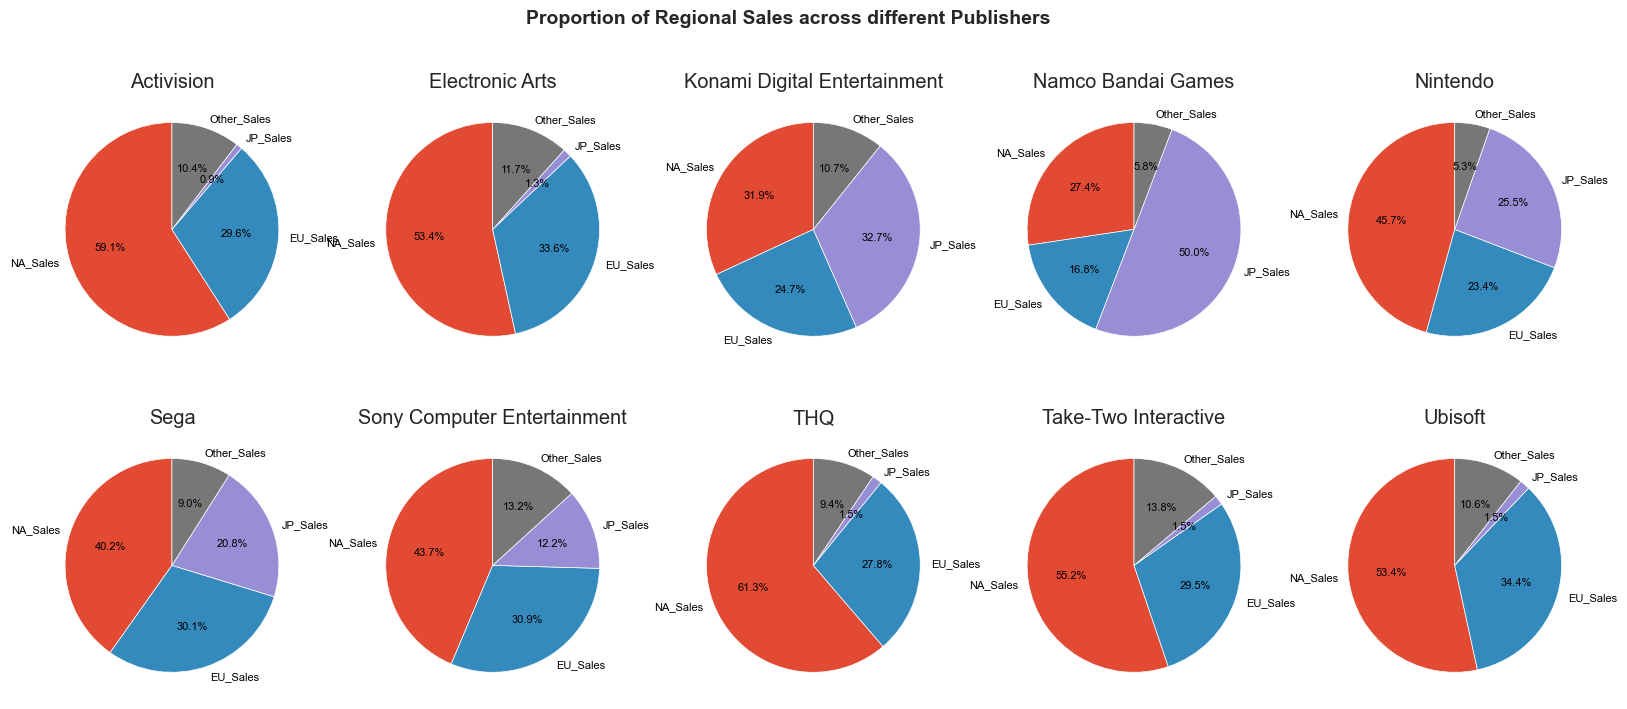

In [47]:
#create a 2x5 grid of subplots
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))

#flatten the ax array so that we can iterate over it
ax = ax.flatten()

#define counter
i = 0
#loop over each row in the dataframe
for index, row in region_sales_by_top10_publisher_df.iterrows():
    
    #plot the pie chart
    ax[i].pie(row.values, 
              labels=region_sales_by_top10_publisher_df.columns, 
              autopct='%1.1f%%', 
              startangle=90, 
              textprops={'color': "Black", 'fontsize': 8})
    
    #set the title for each individual pie chart
    ax[i].set_title(index)
    #update counter
    i += 1

#set super title
fig.suptitle('Proportion of Regional Sales across different Publishers', fontweight="bold", fontsize=14)

#display the plot
plt.show()

Wow! Some of these proportions vary quite wildly. Japanese sales account for a tiny proportion for games published by Activision, Electronic Arts, THQ, Take-Two Interactive and Ubisoft, all of which are American or European companies. On the other hand, Japanese sales account for a much larger proportion for Japanese video game publishers like Konami Digital Entertainment, Namco Bandai Games, Nintendo, Sega and Sony. In particular, 50% of the sales by Namco Bandai Games can be attributed to the Japanese market, indicating the company's heavy reliance and focus on the local market. For Activision and THQ (both American companies), the North American market accounts for 60% of the sales. Finally, the EU market accounted for the largest proportion of sales for Ubisoft, which also happens to be the only European company on this list. These patterns should be a clear indication of the link between the origin of the publisher and regional sales.

# Conclusion

Hooray! Hope you had a lot of fun reading this notebook and was able to learn something. We discussed the usages of multiple data visualizations and techniques to make them more appealing. What other questions do you have about this dataset? How would you construct your visualizations to answer your questions? Feel free to share with me in the comments below! If you also enjoyed this notebook, please give a upvote! Cheers and thank you <3